In [ ]:
import pandas as pd


In [ ]:
# Importing the data
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/student_feedback.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Data exploration
df.columns
df.info()
df.head()
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Unnamed: 0                                            1001 non-null   int64
 1   Student ID                                            1001 non-null   int64
 2   Well versed with the subject                          1001 non-null   int64
 3   Explains concepts in an understandable way            1001 non-null   int64
 4   Use of presentations                                  1001 non-null   int64
 5   Degree of difficulty of assignments                   1001 non-null   int64
 6   Solves doubts willingly                               1001 non-null   int64
 7   Structuring of the course                             1001 non-null   int64
 8   Provides support for students going above and beyond  1001 non-null   int64
 9

In [ ]:
# Sum of Ratings per question
rating_cols = [
    'Well versed with the subject',
    'Explains concepts in an understandable way',
    'Use of presentations',
    'Degree of difficulty of assignments',
    'Solves doubts willingly',
    'Structuring of the course',
    'Provides support for students going above and beyond',
    'Course recommendation based on relevance'
]
sum_ratings = df[rating_cols].sum()
print("Sum of Ratings per Question:\n", sum_ratings)

# Average ratings per question
avg_ratings = df[rating_cols].mean()
print("\nAverage Ratings per Question:\n", avg_ratings)

# Maximum and Minimum ratings per question
max_ratings = df[rating_cols].max()
min_ratings = df[rating_cols].min()
print("\nMaximum Ratings per Question:\n", max_ratings)
print("\nMinimum Ratings per Question:\n", min_ratings)

# Top and least rated question
top_question = avg_ratings.idxmax()
least_question = avg_ratings.idxmin()
print("\nTop rated question:", top_question)
print("Least rated question:", least_question)


# Categorising ratings 1-10  into Positive, Nuetral and Negative
def categorize_rating(rating):
    if rating >= 7:
        return 'Positive'
    elif rating >= 4:
        return 'Neutral'
    else:
        return 'Negative'
for col in rating_cols:
    df[col + '_sentiment'] = df[col].apply(categorize_rating)
df.head()

# Count Sentiment per question
sentiment_counts = pd.DataFrame()
for col in rating_cols:
    sentiment_counts[col] = df[col + '_sentiment'].value_counts()

sentiment_counts = sentiment_counts.fillna(0)
print("\nSentiment Counts per Question:\n", sentiment_counts.T)
df.head()





Sum of Ratings per Question:
 Well versed with the subject                            7505
Explains concepts in an understandable way              6088
Use of presentations                                    5948
Degree of difficulty of assignments                     5436
Solves doubts willingly                                 5480
Structuring of the course                               5642
Provides support for students going above and beyond    5668
Course recommendation based on relevance                5604
dtype: int64

Average Ratings per Question:
 Well versed with the subject                            7.497502
Explains concepts in an understandable way              6.081918
Use of presentations                                    5.942058
Degree of difficulty of assignments                     5.430569
Solves doubts willingly                                 5.474525
Structuring of the course                               5.636364
Provides support for students going above and b

,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance,Well versed with the subject_sentiment,Explains concepts in an understandable way_sentiment,Use of presentations_sentiment,Degree of difficulty of assignments_sentiment,Solves doubts willingly_sentiment,Structuring of the course_sentiment,Provides support for students going above and beyond_sentiment,Course recommendation based on relevance_sentiment
0,340,5,2,7,6,9,2,1,8,Neutral,Negative,Positive,Neutral,Positive,Negative,Negative,Positive
1,253,6,5,8,6,2,1,2,9,Neutral,Neutral,Positive,Neutral,Negative,Negative,Negative,Positive
2,680,7,7,6,5,4,2,3,1,Positive,Positive,Neutral,Neutral,Neutral,Negative,Negative,Negative
3,806,9,6,7,1,5,9,4,6,Positive,Neutral,Positive,Negative,Neutral,Positive,Neutral,Neutral
4,632,8,10,8,4,6,6,9,9,Positive,Positive,Positive,Neutral,Neutral,Neutral,Positive,Positive



Average Ratings per Question:
 Well versed with the subject                            7.497502
Explains concepts in an understandable way              6.081918
Use of presentations                                    5.942058
Provides support for students going above and beyond    5.662338
Structuring of the course                               5.636364
Course recommendation based on relevance                5.598402
Solves doubts willingly                                 5.474525
Degree of difficulty of assignments                     5.430569
dtype: float64


/tmp/ipython-input-2617863777.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ratings.index, y=avg_ratings.values, palette="Purples_d")


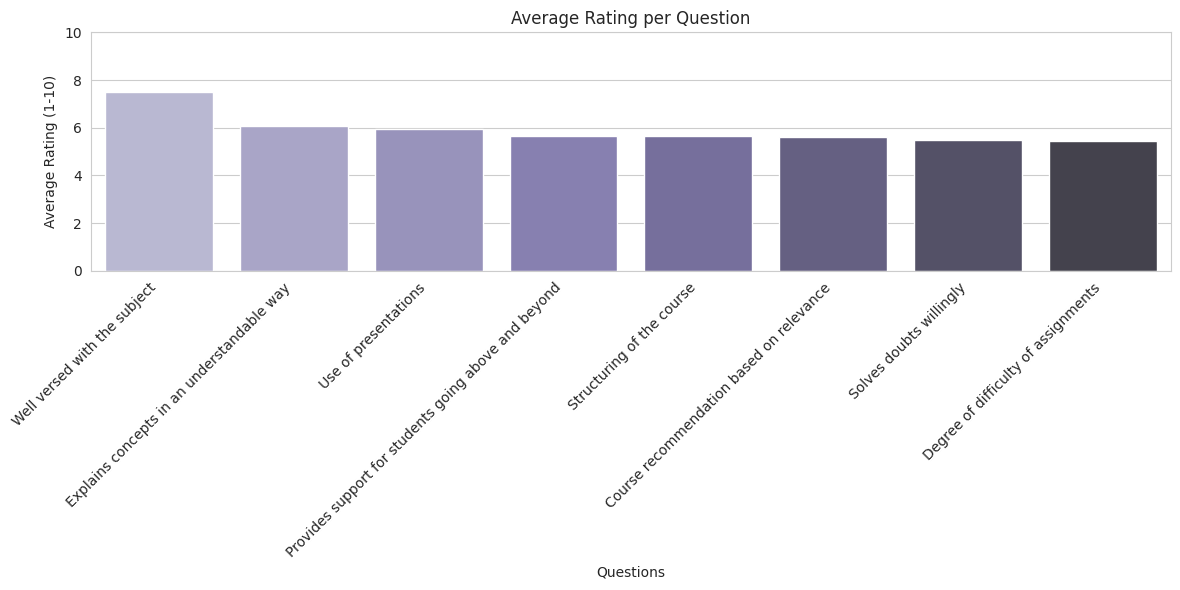

In [ ]:
#Visualizations

# Average rating per question
avg_ratings = df[rating_cols].mean().sort_values(ascending=False)
print("\nAverage Ratings per Question:\n", avg_ratings)
# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=avg_ratings.index, y=avg_ratings.values, palette="Purples_d")
plt.title("Average Rating per Question")
plt.ylabel("Average Rating (1-10)")
plt.xlabel("Questions")
plt.xticks(rotation=45, ha='right')
plt.ylim(0,10)  # since ratings are 1-10
plt.tight_layout()
plt.show()


Well versed with the subject_sentiment
Negative     3430
Neutral     13966
Positive    29975
dtype: int64


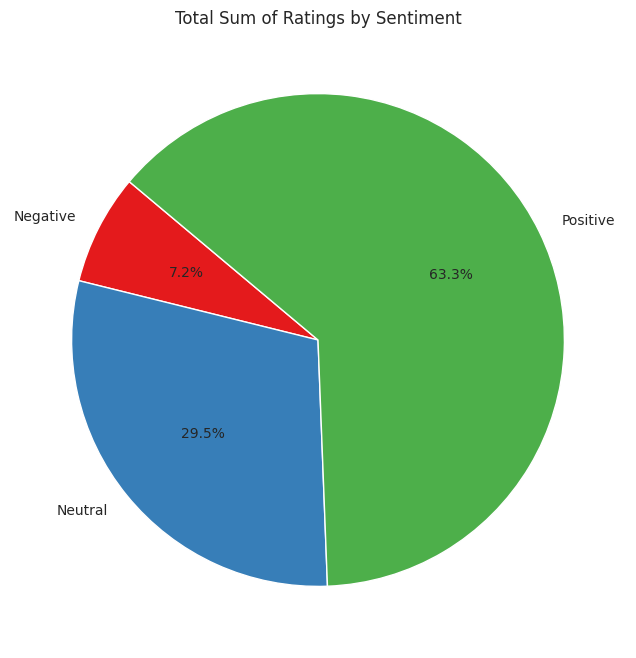

In [ ]:
#Sum of rating by sentiment
categories = ['Negative', 'Neutral', 'Positive']

#  sum_by_sentiment
sum_by_sentiment = pd.DataFrame()
for col in rating_cols:
    sums = df.groupby(col + '_sentiment')[col].sum().reindex(categories, fill_value=0)
    sum_by_sentiment[col] = sums

sum_by_sentiment = sum_by_sentiment.T  # rows = questions

total_sum_sentiment = sum_by_sentiment[categories].sum()
print(total_sum_sentiment)

#plot
colors = ['#e41a1c', '#377eb8', '#4daf4a']  # Negative, Neutral, Positive

plt.figure(figsize=(8,8))
plt.pie(
    total_sum_sentiment,
    labels=total_sum_sentiment.index,
    autopct='%1.1f%%',  # show only percentages
    startangle=140,
    colors=colors)
plt.title("Total Sum of Ratings by Sentiment")
plt.show()

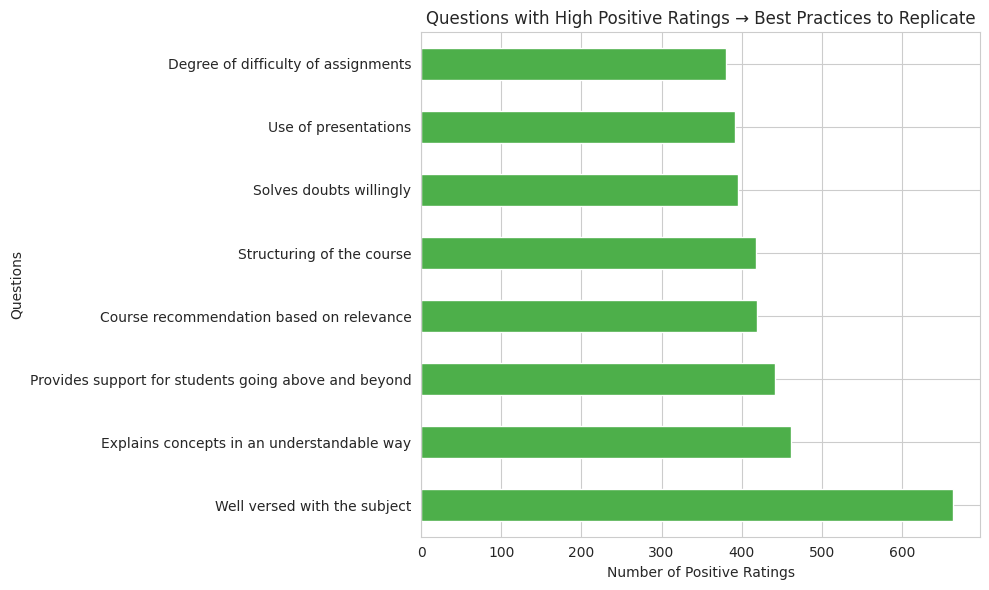

In [ ]:
# Questions with High Positive sentiment
sentiment_counts['Positive'].sort_values(ascending=False).plot(
    kind='barh', color='#4daf4a', figsize=(10,6)
)
plt.xlabel("Number of Positive Ratings")
plt.ylabel("Questions")
plt.title("Questions with High Positive Ratings → Best Practices to Replicate")
plt.tight_layout()
plt.show()



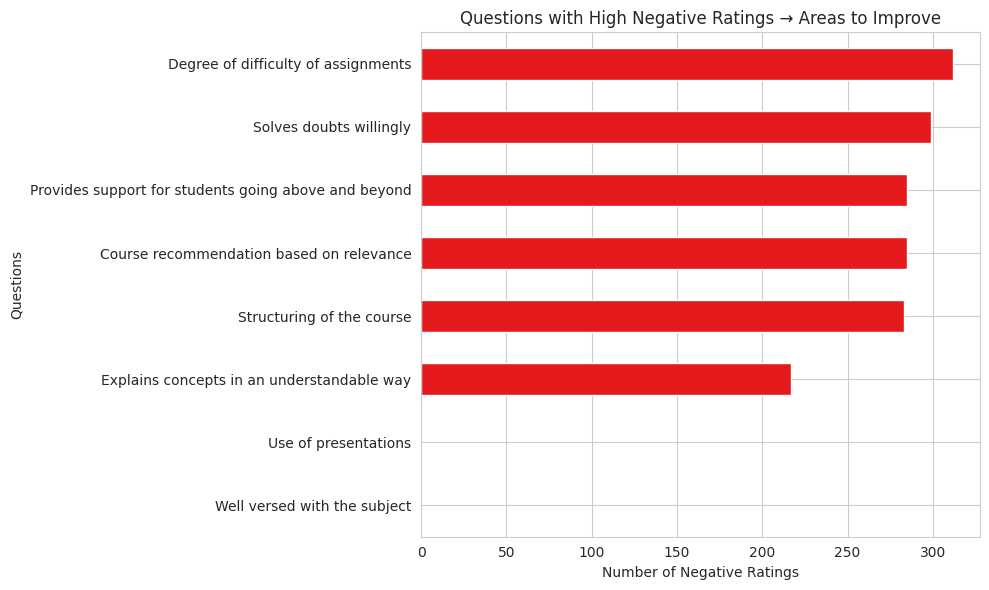

In [ ]:
# Questions with high negative sentiment
sentiment_counts['Negative'].sort_values(ascending=True).plot(
    kind='barh', color='#e41a1c', figsize=(10,6)
)
plt.xlabel("Number of Negative Ratings")
plt.ylabel("Questions")
plt.title("Questions with High Negative Ratings → Areas to Improve")
plt.tight_layout()
plt.show()


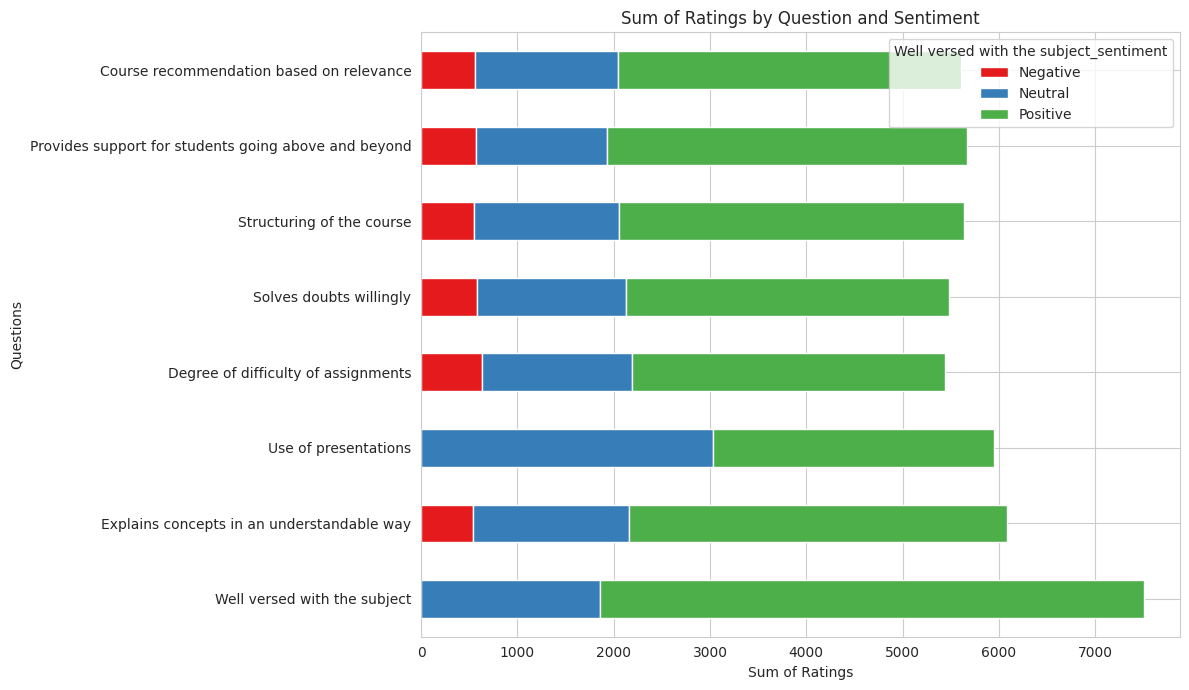

In [ ]:
# Sum of ratings by question and sentiment
sum_by_sentiment = pd.DataFrame()

for col in rating_cols:
    sums = df.groupby(col + '_sentiment')[col].sum().reindex(['Negative','Neutral','Positive'], fill_value=0)
    sum_by_sentiment[col] = sums

sum_by_sentiment = sum_by_sentiment.T  # rows = questions
colors = ['#e41a1c', '#377eb8', '#4daf4a']  # Negative, Neutral, Positive

sum_by_sentiment[['Negative','Neutral','Positive']].plot(
    kind='barh',
    stacked=True,
    figsize=(12,7),
    color=colors
)

plt.xlabel("Sum of Ratings")
plt.ylabel("Questions")
plt.title("Sum of Ratings by Question and Sentiment")
plt.tight_layout()
plt.show()

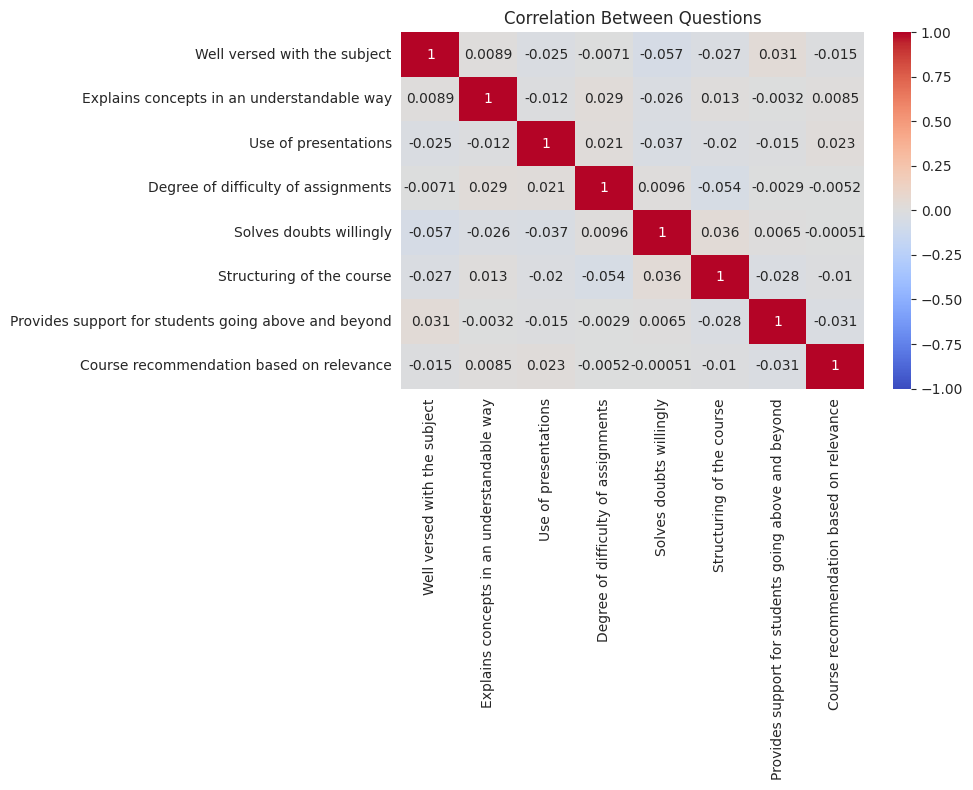

In [ ]:
# Correlation heatmap between questions
plt.figure(figsize=(10,8))
corr = df[rating_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Between Questions")
plt.tight_layout()
plt.show()


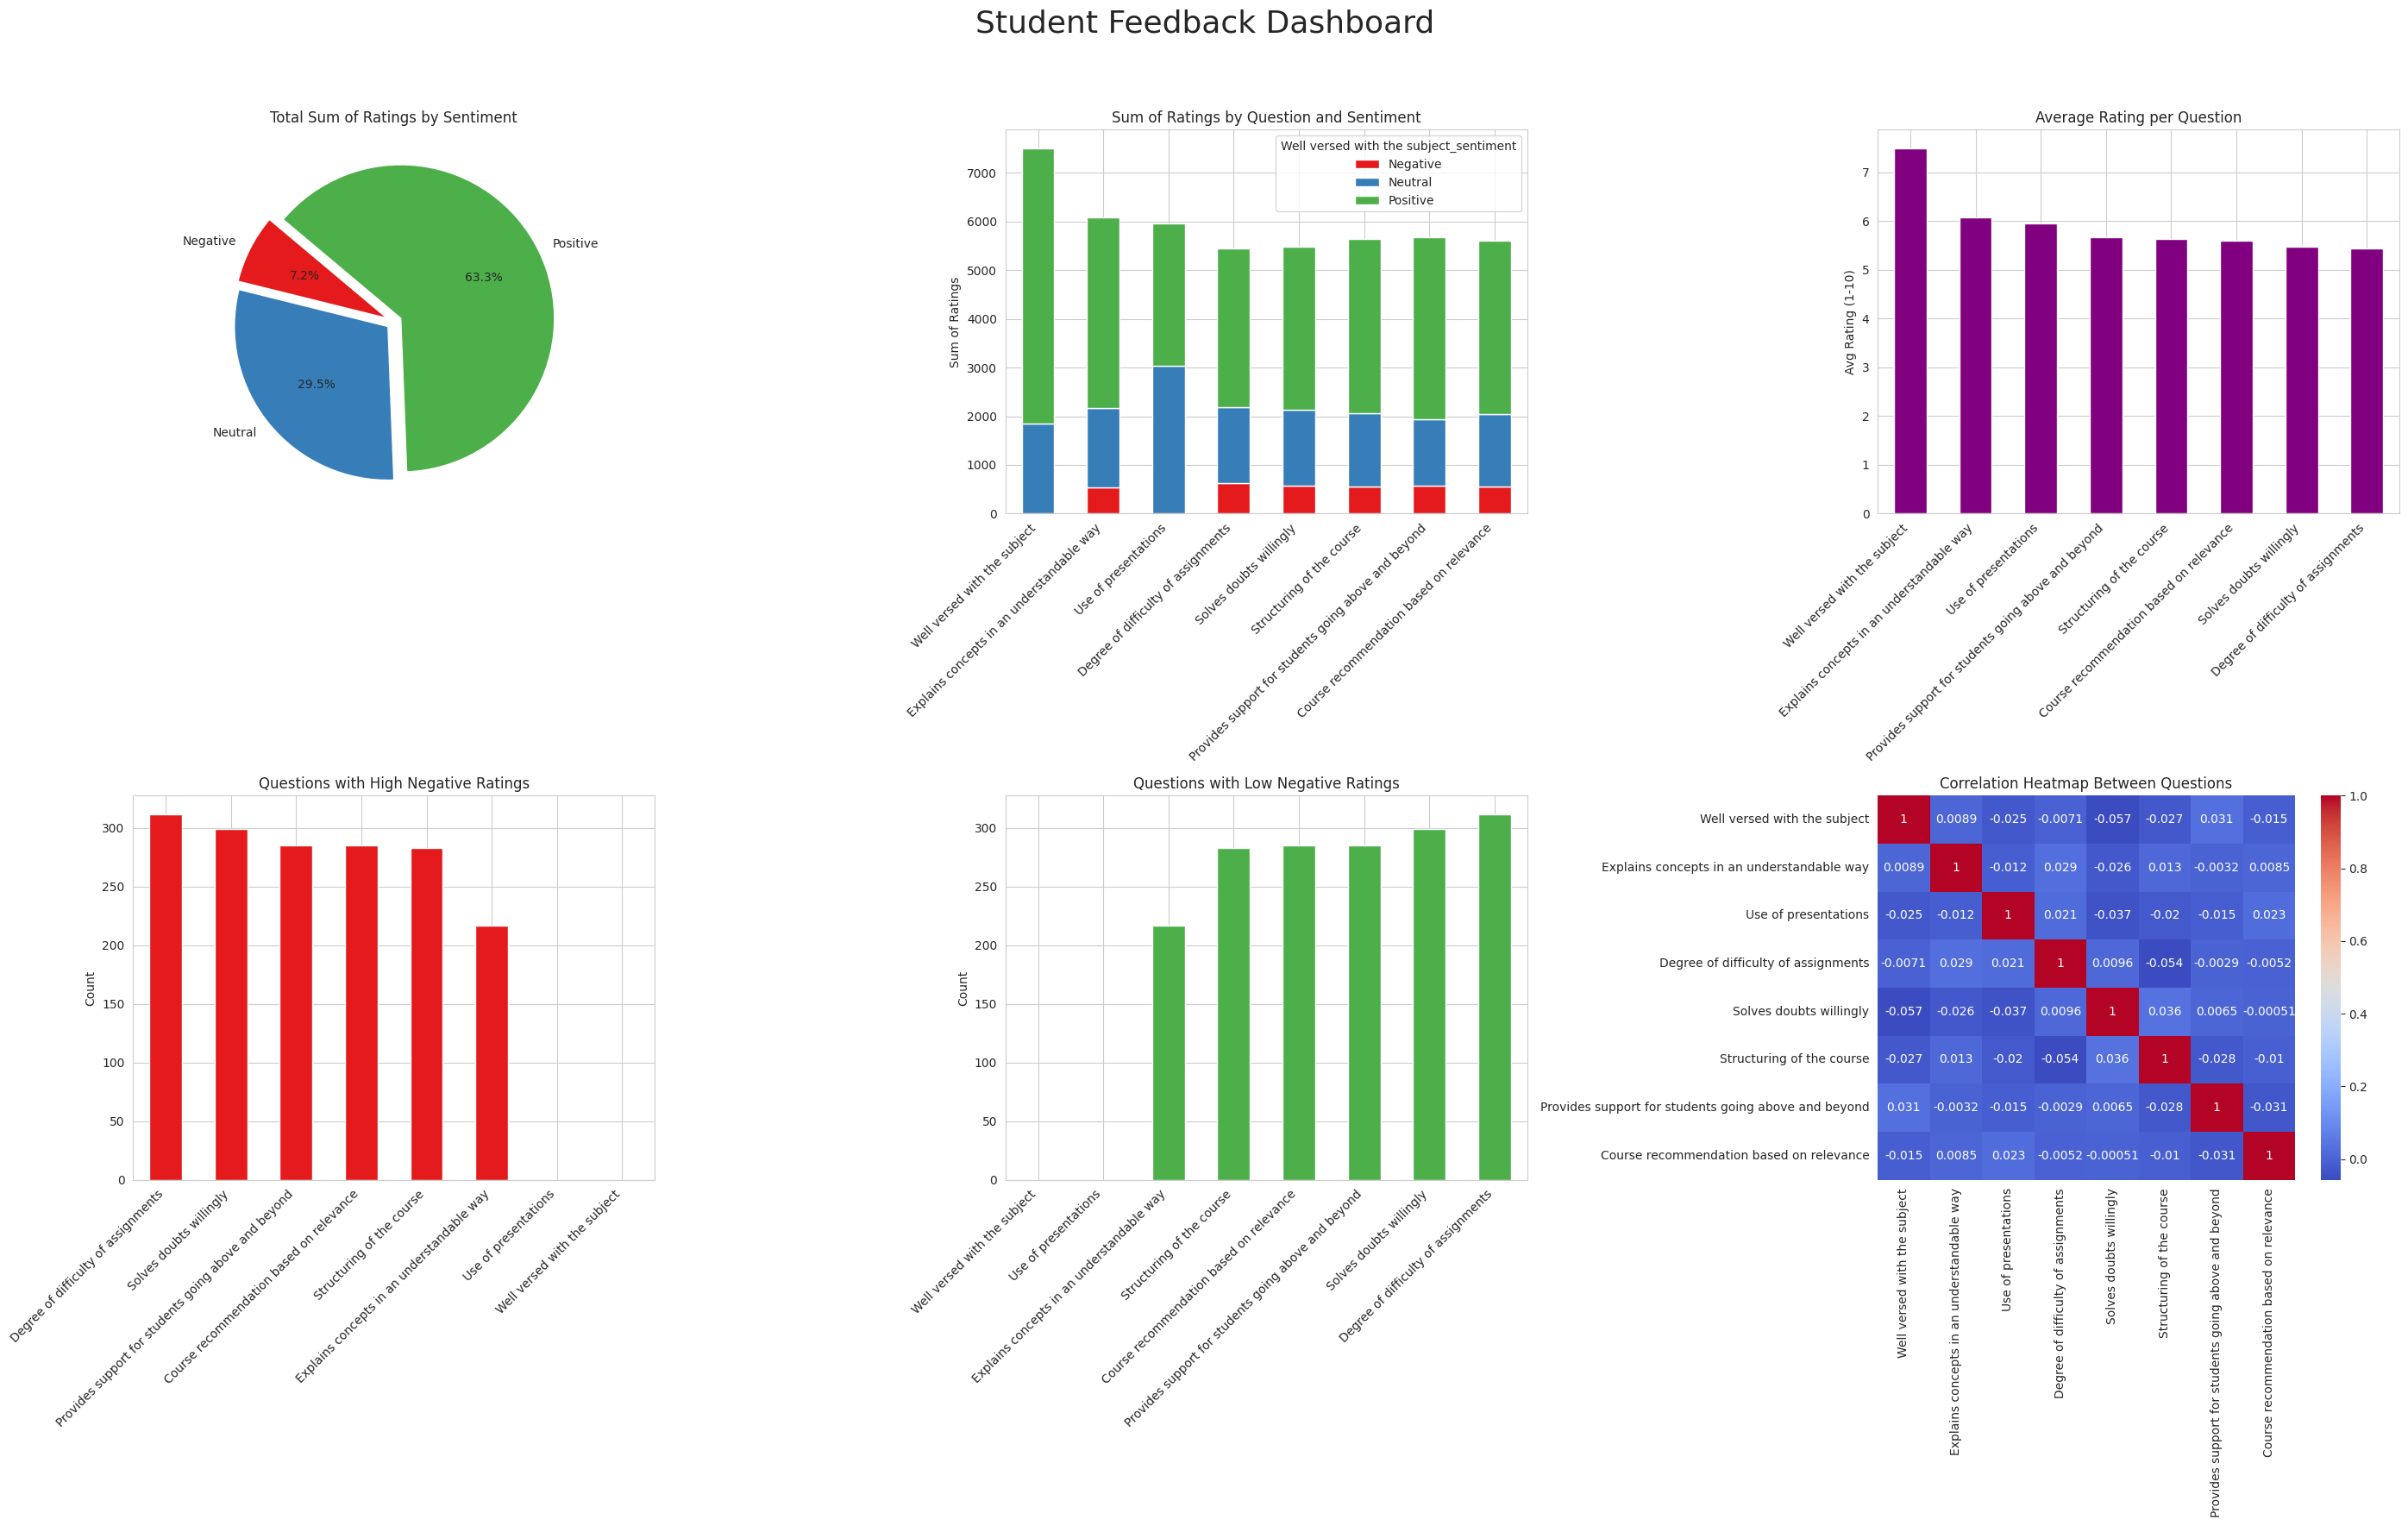

In [ ]:
# Creating Dashboard
fig = plt.figure(figsize=(28,18))
fig.suptitle("Student Feedback Dashboard", fontsize=26)

# 1️⃣ Total Sum of Ratings by Sentiment (Pie Chart)
ax1 = fig.add_subplot(2,3,1)
ax1.pie(
    total_sum_sentiment,
    labels=total_sum_sentiment.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    explode=(0.05,0.05,0.05)
)
ax1.set_title("Total Sum of Ratings by Sentiment")

# 2️⃣ Sum of Ratings by Question and Sentiment (Stacked Bar Chart)
ax2 = fig.add_subplot(2,3,2)
sum_by_sentiment[['Negative','Neutral','Positive']].plot(kind='bar', stacked=True, ax=ax2, color=colors)
ax2.set_title("Sum of Ratings by Question and Sentiment")
ax2.set_ylabel("Sum of Ratings")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

# 3️⃣ Average Rating per Question
ax3 = fig.add_subplot(2,3,3)
avg_ratings.plot(kind='bar', color='purple', ax=ax3)
ax3.set_title("Average Rating per Question")
ax3.set_ylabel("Avg Rating (1-10)")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')

# 4️⃣ Questions with High Negative Ratings
ax4 = fig.add_subplot(2,3,4)
sentiment_counts['Negative'].sort_values(ascending=False).plot(kind='bar', color='#e41a1c', ax=ax4)
ax4.set_title("Questions with High Negative Ratings")
ax4.set_ylabel("Count")
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')

# 5️⃣ Questions with Low Negative Ratings
ax5 = fig.add_subplot(2,3,5)
sentiment_counts['Negative'].sort_values().plot(kind='bar', color='#4daf4a', ax=ax5)
ax5.set_title("Questions with Low Negative Ratings")
ax5.set_ylabel("Count")
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=45, ha='right')

# 6️⃣ Correlation Heatmap Between Questions
ax6 = fig.add_subplot(2,3,6)
sns.heatmap(df[rating_cols].corr(), annot=True, cmap='coolwarm', ax=ax6)
ax6.set_title("Correlation Heatmap Between Questions")

plt.tight_layout(rect=[0,0,1,0.95])
plt.savefig("student_feedback_dashboard.png", dpi=300)
plt.show()

## Key Recommendations

- **Leverage Strengths:**  
  *“Well versed with the subject”* and *“Explains concepts in an understandable way”* had the highest average rating with high positive sentiments. These teaching practices should be maintained.

- **Address Weak Areas:**  
  *“Degree of difficulty of assignments”* received the lowest ratings and the highest negative feedback. This should be reviewed and provide extra guidance or resources to help students succeed.

- **Overall Sentiment:**  
  Most feedback is positive, followed by neutral, with few negative ratings. Continue reinforcing effective practices while addressing neutral or negative areas promptly.

